PRADYTHA GALUH PUTRANTI 2304220013

<ipython-input-5-8bbe3b1d649c>:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range('1960-03', periods=len(gEco), freq='Q')


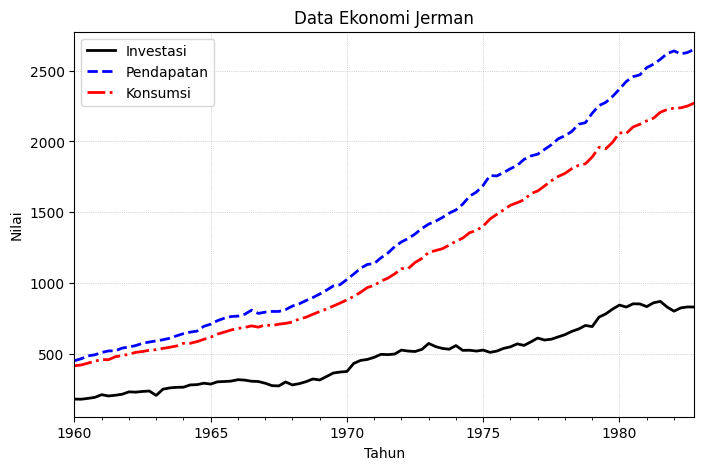

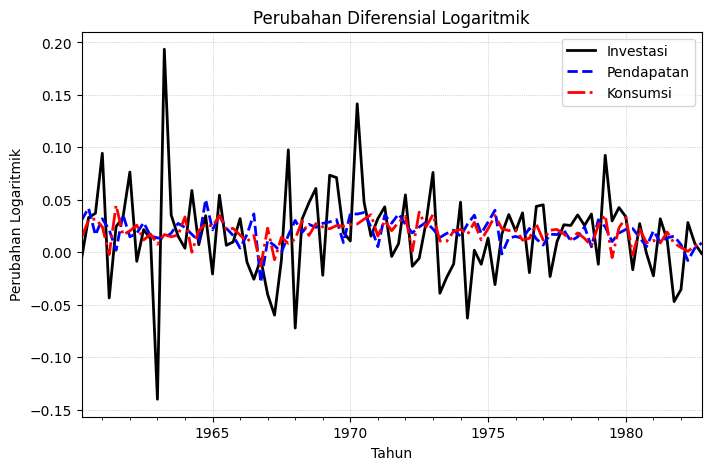

dlge:
                 inv.      inc.     cons.
1982-03-31 -0.035565  0.007226  0.004484
1982-06-30  0.028310 -0.007989  0.000894
1982-09-30  0.008459  0.003812  0.005795
1982-12-31 -0.001204  0.008714  0.009290


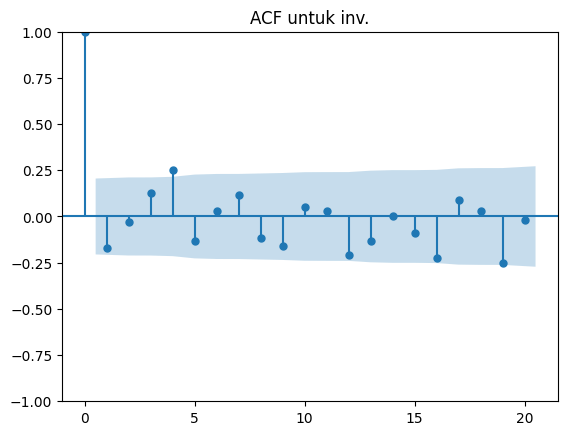

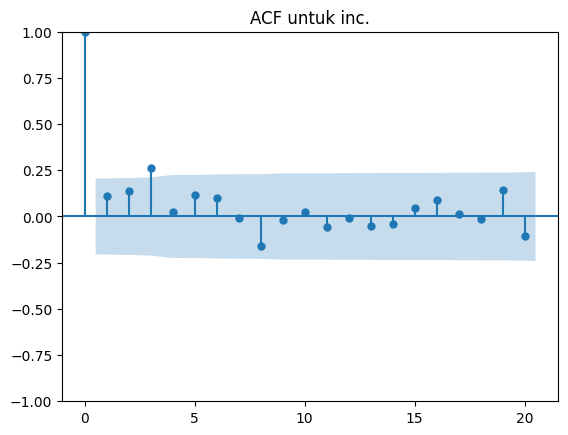

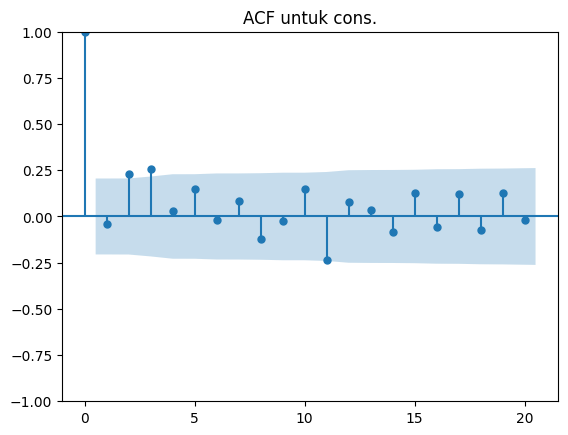

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf

# Membaca data Ekonomi Jerman
gEco = pd.read_csv('EconGermany.dat', header=0, sep=r'\s+')

# Mengatur indeks waktu
dates = pd.date_range('1960-03', periods=len(gEco), freq='Q')
gEco.index = dates

# Ambil kolom yang dibutuhkan
gEco = gEco[['inv.', 'inc.', 'cons.']]

# Plot data awal
gEco.plot(
    style=['-', '--', '-.'],
    color=['black', 'blue', 'red'],
    figsize=(8, 5),
    linewidth=2.0
)
plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.title('Data Ekonomi Jerman')
plt.legend(['Investasi', 'Pendapatan', 'Konsumsi'], loc='best')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()

# Menghitung diferensial logaritmik
dlge = np.log(gEco).diff(1).dropna()

# Plot data yang sudah didiferensiasi
dlge.plot(
    style=['-', '--', '-.'],
    color=['black', 'blue', 'red'],
    figsize=(8, 5),
    linewidth=2.0
)
plt.xlabel('Tahun')
plt.ylabel('Perubahan Logaritmik')
plt.title('Perubahan Diferensial Logaritmik')
plt.legend(['Investasi', 'Pendapatan', 'Konsumsi'], loc='best')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()

# Print 4 baris terakhir data
print("dlge:\n", dlge.tail(4))

# Tambahan: plot ACF untuk masing-masing variabel
for col in dlge.columns:
    plot_acf(dlge[col], lags=20)
    plt.title(f'ACF untuk {col}')
    plt.show()


In [ ]:
# Install R and rpy2
!apt-get install -y r-base r-base-dev
!pip install rpy2

# Load the R magic extension
%load_ext rpy2.ipython

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base-dev is already the newest version (4.5.0-3.2204.0).
r-base is already the newest version (4.5.0-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!pip install statsmodels pandas numpy matplotlib seaborn

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 2, BIC -> 0, FPE -> 2, HQIC ->  1>
<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 1, BIC -> 0, FPE -> 1, HQIC ->  0>
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 23, May, 2025
Time:                     03:29:45
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -24.0674
Nobs:                     85.0000    HQIC:                  -24.4282
Log likelihood:           707.684    FPE:                1.93219e-11
AIC:                     -24.6709    Det(Omega_mle):     1.52386e-11
--------------------------------------------------------------------
Results for equation inv.
              coefficient       std. error           t-stat            prob
-------------------------------------------------------------

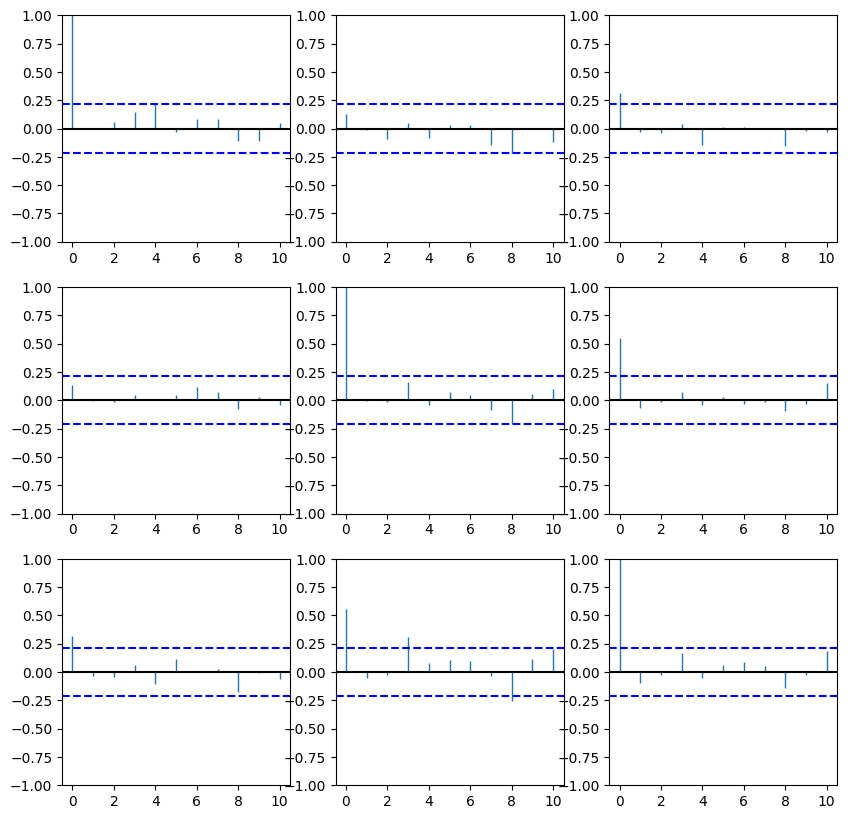

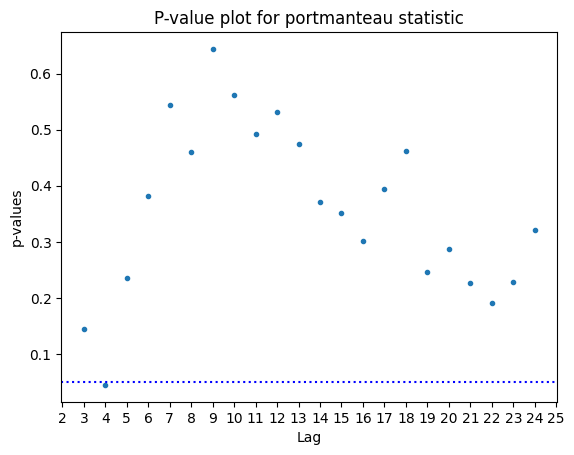

Koefisien model: [[[-0.29852954  0.37906743  0.66598562]
  [ 0.03938029 -0.14633432  0.25628306]
  [-0.00513406  0.28084152 -0.32127566]]

 [[-0.13889995  0.18243526  0.66811412]
  [ 0.05381098  0.00744979  0.01847657]
  [ 0.04134668  0.36344357 -0.12828162]]]
Kovarians residu:            inv.      inc.     cons.
inv.   0.002004  0.000065  0.000140
inc.   0.000065  0.000125  0.000061
cons.  0.000140  0.000061  0.000098
Tipe data: <class 'numpy.ndarray'>
Forecast: [[0.02777827 0.01473927 0.01903946]
 [0.01350363 0.01712411 0.01468125]
 [0.01224347 0.01931209 0.01834218]
 [0.01539323 0.01904964 0.01862259]]
Lower bound: [[-0.05997249 -0.0071755  -0.00035114]
 [-0.07852948 -0.00562412 -0.0056024 ]
 [-0.08028986 -0.00372197 -0.00345532]
 [-0.0776575  -0.0041226  -0.00329656]]
Upper bound: [[0.11552903 0.03665404 0.03843006]
 [0.10553675 0.03987234 0.03496491]
 [0.1047768  0.04234616 0.04013969]
 [0.10844396 0.04222187 0.04054173]]


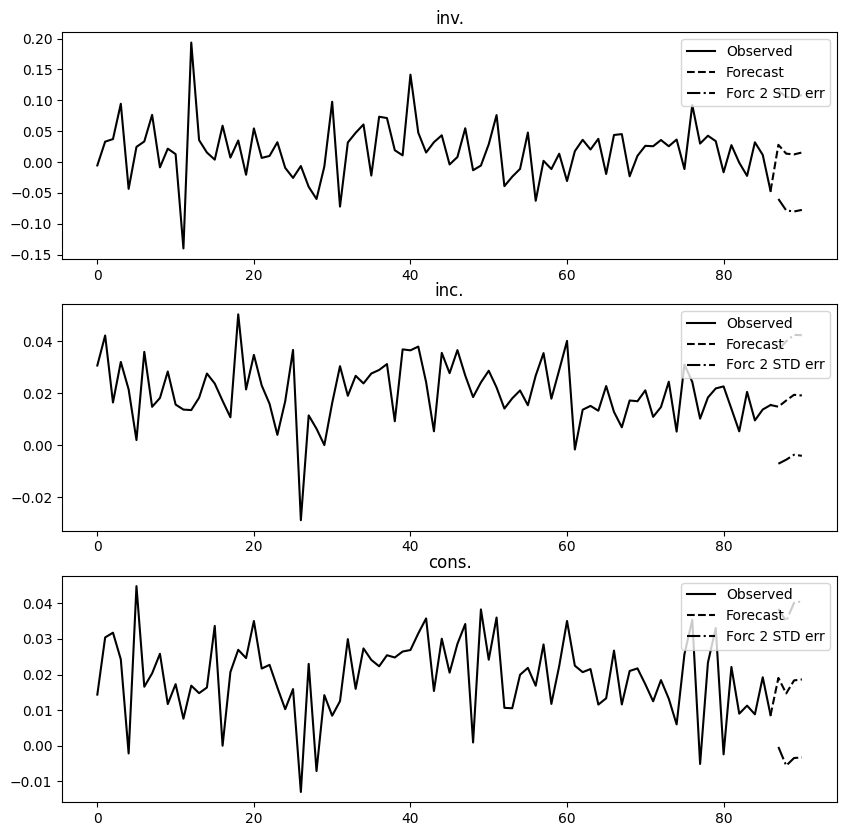

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: inc. does not Granger-cause cons.: reject at 5% significance level. Test statistic: 7.038, critical value: 3.034>, p-value: 0.001>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: cons. does not Granger-cause inc.: fail to reject at 5% significance level. Test statistic: 1.718, critical value: 3.034>, p-value: 0.182>


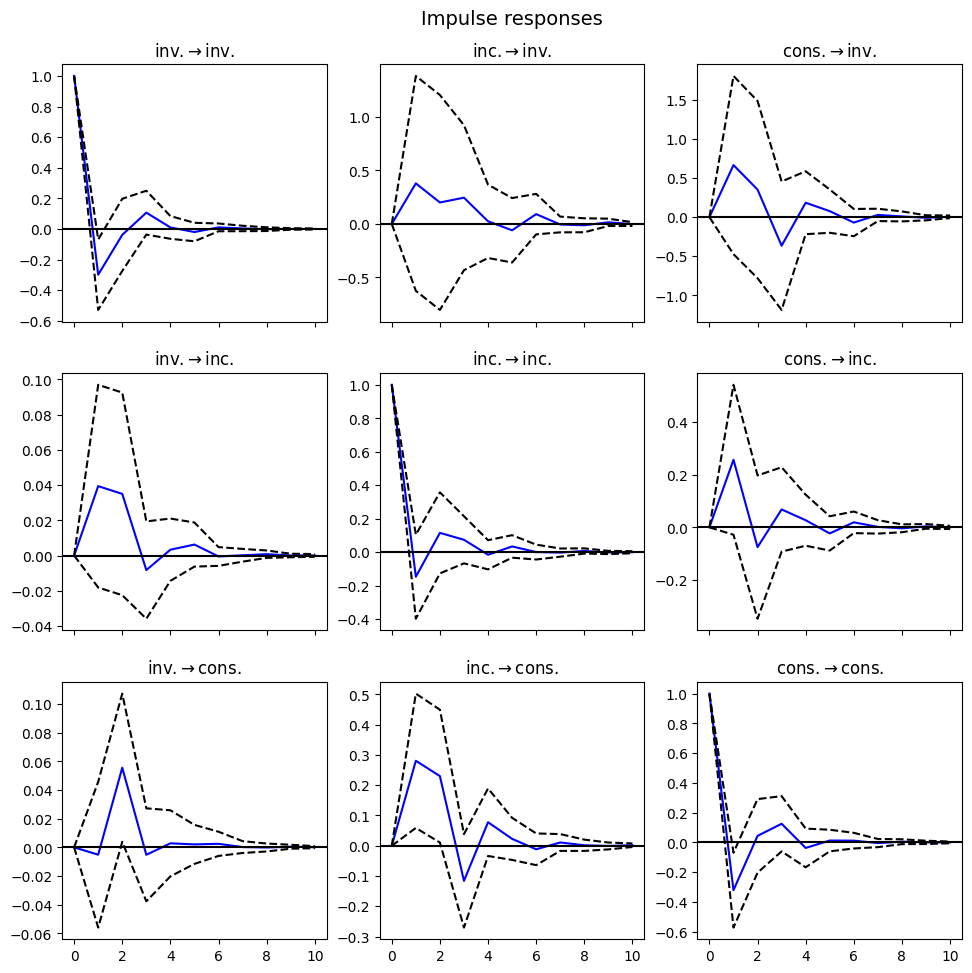

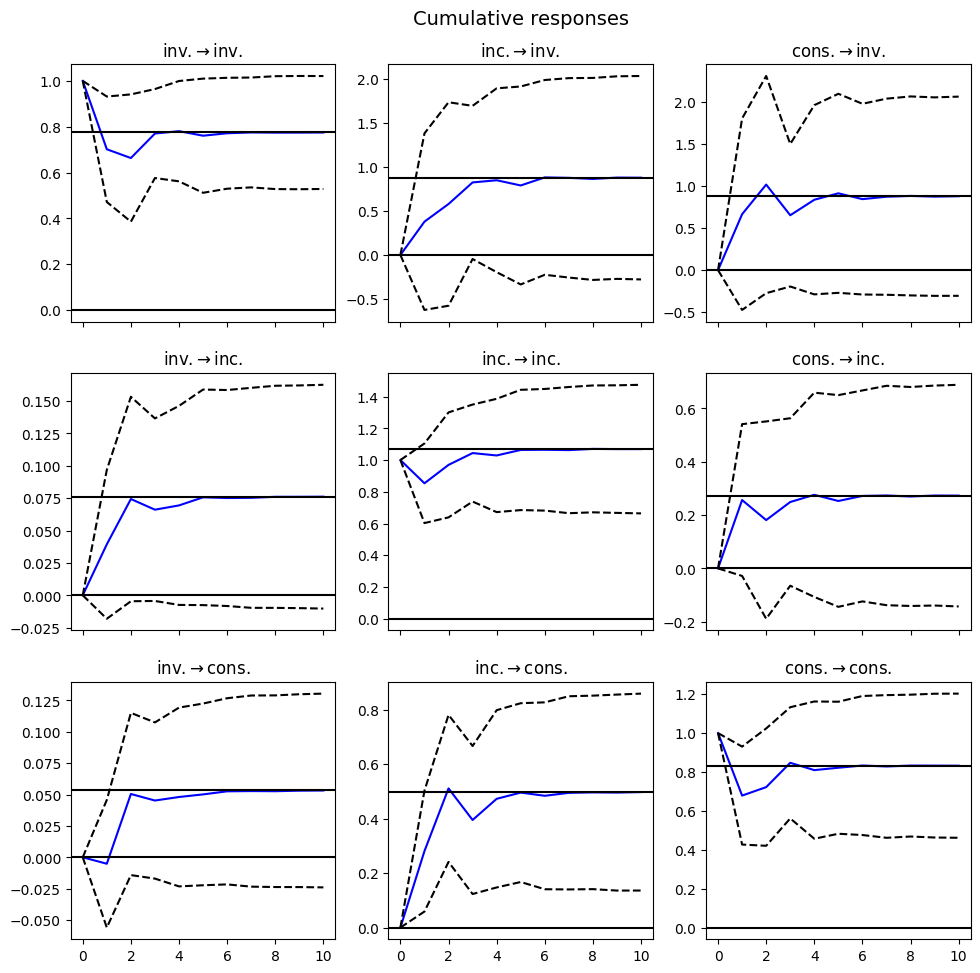

In [ ]:
# Pemilihan model VAR
dlgemMod = VAR(dlgem)
print(dlgemMod.select_order(maxlags=4))
print(dlgemMod.select_order(maxlags=9))

# Estimasi model VAR dengan lag 2
dlgemRes = dlgemMod.fit(maxlags=2, ic=None, trend='c')
print(dlgemRes.summary())

# Uji kestabilan model
print("Model stabil:", dlgemRes.is_stable())

# Plot ACF residu
resid = dlgemRes.resid
multi_ACFfig(resid, nlags=10)
plt.show()

# Uji nilai p dari residu
q, p = MultiQpvalue_plot(resid, p=2, q=0, noestimatedcoef=18, nolags=24)
plt.show()

# Koefisien model
coefMat = dlgemRes.coefs
print("Koefisien model:", coefMat)

# Kovarians residu
sigma_u = dlgemRes.sigma_u
print("Kovarians residu:", sigma_u)

# Konversi ke numpy array untuk forecasting
dlgem_array = dlgem.values
print("Tipe data:", type(dlgem_array))

# Peramalan dengan interval kepercayaan
point, lower, upper = dlgemRes.forecast_interval(dlgem_array, steps=4)
print("Forecast:", point)
print("Lower bound:", lower)
print("Upper bound:", upper)

# Plot hasil peramalan
dlgemRes.plot_forecast(steps=4)
plt.show()

# Uji kausalitas Granger
g1 = dlgemRes.test_causality(caused='cons.', causing='inc.', kind='f', signif=0.05)
print(g1)

g2 = dlgemRes.test_causality(caused='inc.', causing='cons.', kind='f', signif=0.05)
print(g2)

# Analisis Impulse Response Function (IRF)
irf = dlgemRes.irf(periods=10)
irf.plot()
plt.show()

# Plot efek kumulatif IRF
irf.plot_cum_effects()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 20.6 MB/s eta 0:00:00


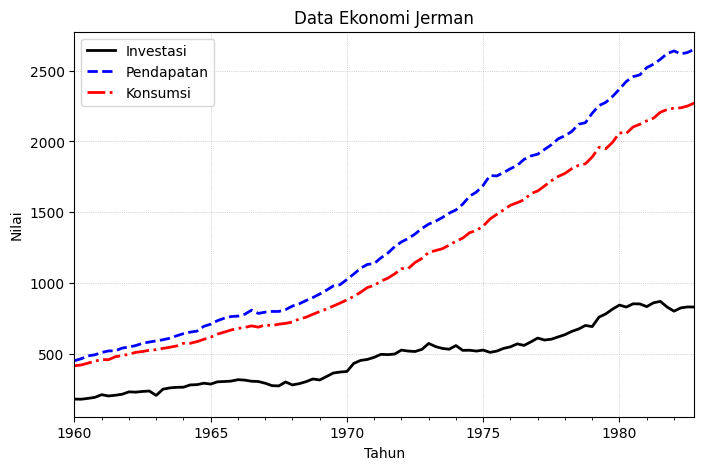

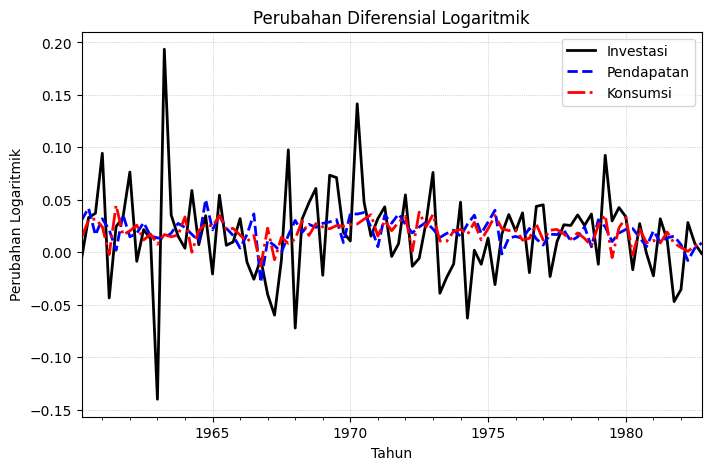

dlge:
                 inv.      inc.     cons.
1982-03-31 -0.035565  0.007226  0.004484
1982-06-30  0.028310 -0.007989  0.000894
1982-09-30  0.008459  0.003812  0.005795
1982-12-31 -0.001204  0.008714  0.009290


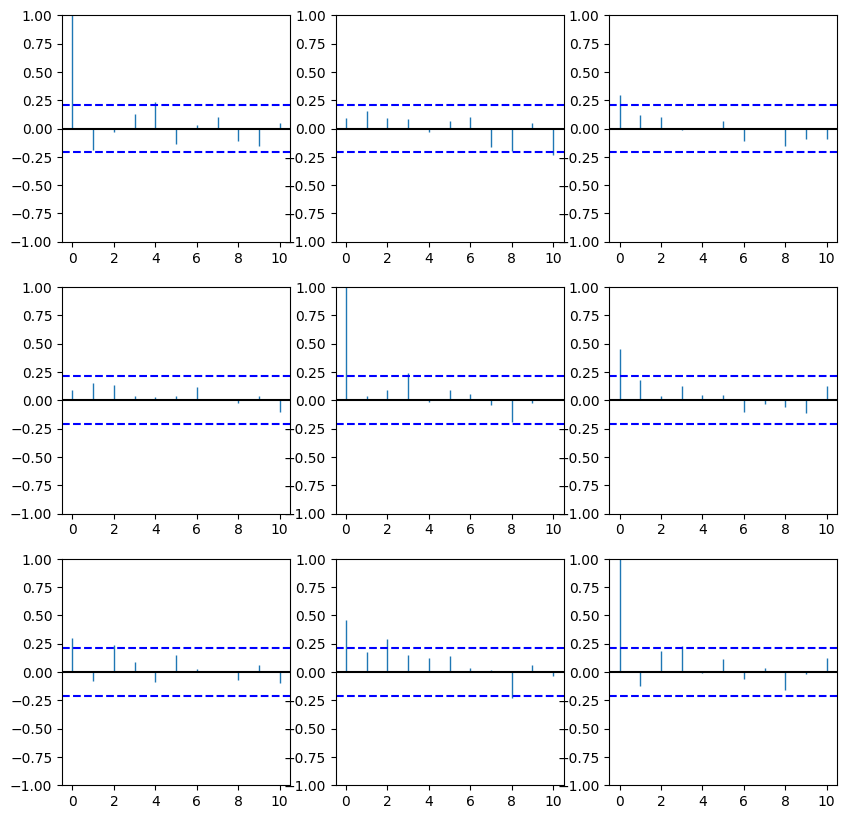

dlgem:
                 inv.      inc.     cons.
1981-03-31 -0.022553  0.020437  0.011252
1981-06-30  0.031899  0.009475  0.008819
1981-09-30  0.011561  0.013659  0.019223
1981-12-31 -0.047068  0.015385  0.008576


In [ ]:
!pip install PythonTsa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels. tsa.api import VAR
from PythonTsa.plot_multi_ACF import multi_ACFfig
from PythonTsa.plot_multi_Q_pvalue import MultiQpvalue_plot
# Membaca data Ekonomi Jerman
gEco = pd.read_csv('EconGermany.dat', header=0, sep=r'\s+')
# Mengatur indeks waktu
dates = pd. date_range ('1960-03', periods=len (gEco), freq='QE')
gEco.index = dates
gEco = gEco[['inv.', 'inc.', 'cons.']]
# Plot data awal
gEco.plot (style=['-','--', '-.'], color=['black', 'blue', 'red'],
     figsize=(8, 5), linewidth=2.0)
plt.xlabel ('Tahun'); plt.ylabel( 'Nilai')
plt.title('Data Ekonomi Jerman')
plt.legend (['Investasi','Pendapatan','Konsumsi'], loc='best')
plt.grid(True, linestyle=':' , linewidth=0.5)
plt. show ()
# Menghitung diferensial logaritmik
dlge = np.log(gEco).diff(1).dropna()
# Plot data yang sudah didiferensiasi
dlge.plot (style=['-','--', '-.'], color=['black', 'blue', 'red'],
    figsize=(8, 5), linewidth=2.0)
plt.xlabel ( 'Tahun'); plt. ylabel ('Perubahan Logaritmik')
plt.title('Perubahan Diferensial Logaritmik')
plt. legend(['Investasi', 'Pendapatan', 'Konsumsi'], loc='best')
plt. grid (True, linestyle=':', linewidth=0.5)
plt. show ()
print("dlge:\n", dlge. tail (4))
# Memilih data untuk analisis (menyisakan 4 data terakhir untuk peramalan)
dlgem = dlge['1960-06-30':'1981-12-31']
# Plot ACF untuk data yang telah di diferensiasi
multi_ACFfig(dlgem, nlags=10)
plt.show()
print("dlgem:\n", dlgem.tail(4))

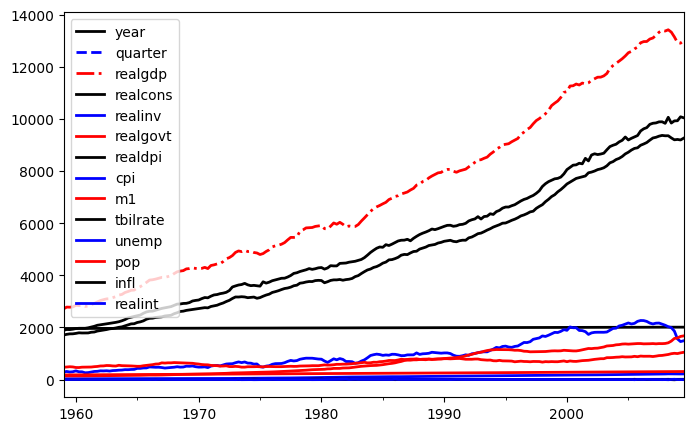

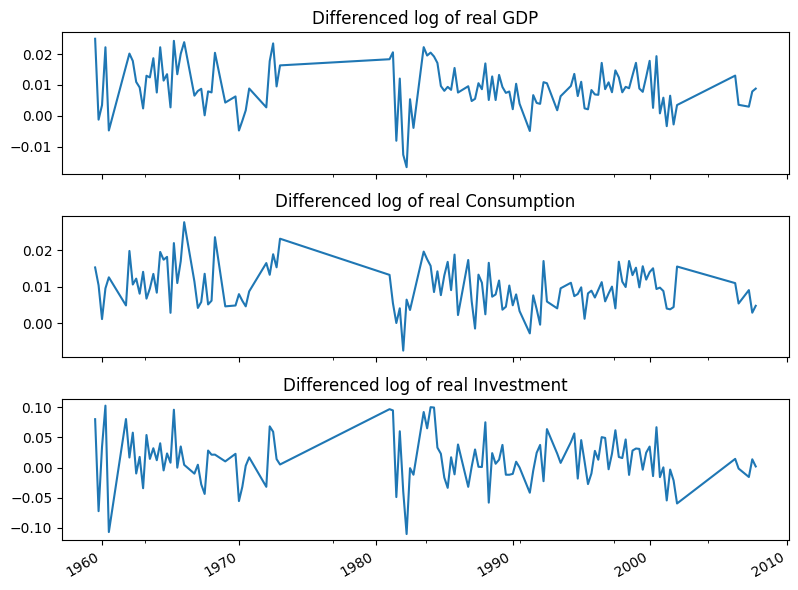

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, VARMAX
from PythonTsa.plot_multi_ACF import multi_ACFfig
from PythonTsa.plot_multi_Q_pvalue import MultiQpvalue_plot

# Load data makroekonomi AS dari statsmodels
mdata = sm.datasets.macrodata.load_pandas().data
ndata = mdata[['realgdp', 'realcons', 'realinv']]

# Konversi index menjadi format tanggal dengan frekuensi akhir triwulanan (QE)
dates = pd.date_range('1959-01', periods=len(mdata), freq='QE')
mdata.index = dates

# Plot data awal
mdata.plot(style=['-', '--', '-.'], color=['black', 'blue', 'red'],
          figsize=(8, 5), linewidth=2.0)
plt.show()

# Menghitung log differencing dan menghapus nilai NaN
dLdata = np.log(mdata).diff(1).dropna()

# Plot data yang telah didiferensiasi
fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
dLdata['realgdp'].plot(ax=axes[0])
axes[0].set_title('Differenced log of real GDP')
dLdata['realcons'].plot(ax=axes[1])
axes[1].set_title('Differenced log of real Consumption')
dLdata['realinv'].plot(ax=axes[2])
axes[2].set_title('Differenced log of real Investment')
plt.tight_layout()
plt.show()

# Menyimpan sebagian data untuk perbandingan peramalan

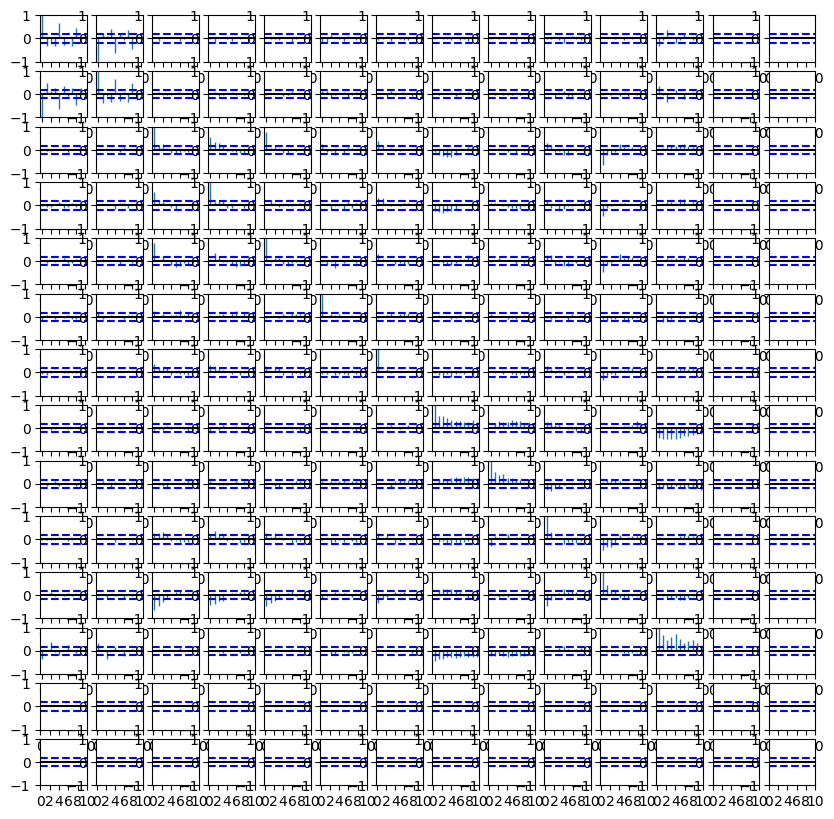

In [ ]:
myd = dLdata['1959-06-30':'2008-12-31']

# Plot ACF dari data yang sudah didiferensiasi
multi_ACFfig(myd, nlags=10)
plt.show()

In [ ]:
# Bersihkan data dari inf/-inf dengan mengganti jadi NaN
myd.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop baris yang mengandung NaN
myd.dropna(inplace=True)

# Tampilkan dimensi data setelah dibersihkan
print("Data setelah dibersihkan:", myd.shape)


Data setelah dibersihkan: (120, 14)


In [ ]:
print(myd.describe())


             year       quarter     realgdp    realcons     realinv  \
count  120.000000  1.200000e+02  120.000000  120.000000  120.000000   
mean     0.000126  1.850372e-17    0.009012    0.009721    0.012846   
std      0.000219  8.172656e-01    0.007547    0.005948    0.040279   
min      0.000000 -1.386294e+00   -0.016547   -0.007584   -0.110019   
25%      0.000000 -1.308120e-01    0.004697    0.005307   -0.010515   
50%      0.000000  3.465736e-01    0.008716    0.009083    0.013122   
75%      0.000125  4.773856e-01    0.013317    0.013523    0.034537   
max      0.000510  6.931472e-01    0.024265    0.027733    0.102664   

         realgovt     realdpi         cpi          m1    tbilrate       unemp  \
count  120.000000  120.000000  120.000000  120.000000  120.000000  120.000000   
mean     0.002525    0.009651    0.008155    0.010222   -0.005438   -0.005840   
std      0.021784    0.008015    0.005046    0.012784    0.118450    0.045499   
min     -0.055367   -0.014785    0.0

In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import acf
import seaborn as sns

# Contoh: misalnya kamu sudah punya dataframe bernama myd
# Pastikan myd sudah terdefinisi. Jika belum, load dari file CSV misalnya:
# myd = pd.read_csv('namafile.csv')

# ===================== #
# 1. CEK & BERSIHKAN NILAI TIDAK VALID
# ===================== #
myd.replace([np.inf, -np.inf], np.nan, inplace=True)
myd.dropna(inplace=True)
assert not myd.isnull().values.any(), "Data mengandung NaN"
assert np.isfinite(myd.values).all(), "Data mengandung inf atau -inf"

# ===================== #
# 2. FUNGSI VISUALISASI RESIDUAL
# ===================== #

def multi_ACFfig(resid, nlags=10):
    n_vars = resid.shape[1]
    fig, axes = plt.subplots(n_vars, 1, figsize=(10, 3*n_vars))
    if n_vars == 1:
        axes = [axes]
    for i in range(n_vars):
        acf_vals = acf(resid.iloc[:, i], nlags=nlags, fft=False)
        axes[i].stem(range(len(acf_vals)), acf_vals)
        axes[i].axhline(y=0, color='k', linestyle='-', alpha=0.3)
        axes[i].axhline(y=1.96/np.sqrt(len(resid)), color='r', linestyle='--', alpha=0.5)
        axes[i].axhline(y=-1.96/np.sqrt(len(resid)), color='r', linestyle='--', alpha=0.5)
        axes[i].set_title(f'ACF for Variable {i+1}')
        axes[i].set_xlabel('Lag')
        axes[i].set_ylabel('ACF')
    plt.tight_layout()

def MultiQpvalue_plot(resid, p=3, q=0, noestimatedcoef=27, nolags=24):
    n_vars = resid.shape[1]
    p_values = []
    q_stats = []
    fig, ax = plt.subplots(figsize=(10, 6))
    for i in range(n_vars):
        lb_stat, lb_pvalue = acorr_ljungbox(resid.iloc[:, i], lags=nolags, return_df=False)
        q_stats.append(lb_stat)
        p_values.append(lb_pvalue)
        ax.plot(range(1, len(lb_pvalue)+1), lb_pvalue, marker='o', label=f'Variable {i+1}')
    ax.axhline(y=0.05, color='r', linestyle='--', alpha=0.7, label='α = 0.05')
    ax.set_xlabel('Lag')
    ax.set_ylabel('P-value')
    ax.set_title('Ljung-Box Test P-values')
    ax.legend()
    ax.grid(True, alpha=0.3)
    return q_stats, p_values

# ===================== #
# 3. PEMILIHAN LAG OPTIMAL
# ===================== #
model = VAR(myd)
order_result = model.select_order(maxlags=5)
print("Pemilihan orde VAR (maxlags=5):")
print(order_result.summary())

# Gunakan lag optimal dari AIC
lag_opt = int(order_result.aic)  # Convert to int, karena sudah scalar
print(f"\nMenggunakan lag optimal (AIC): {lag_opt}")

# ===================== #
# 4. FITTING VARMAX
# ===================== #
mydmod = VARMAX(myd, order=(lag_opt, 0), enforce_stationarity=True)
modfit = mydmod.fit()
print("\nHasil fitting model VARMAX:")
print(modfit.summary())

# ===================== #
# 5. ANALISIS RESIDUAL
# ===================== #
resid = modfit.resid
multi_ACFfig(resid, nlags=10)
plt.show()

qs, pv = MultiQpvalue_plot(resid, p=lag_opt, q=0, noestimatedcoef=lag_opt*myd.shape[1], nolags=24)
plt.show()


Pemilihan orde VAR (maxlags=5):
 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -115.4      -115.1   7.317e-51      -115.3
1      -120.5     -115.4*   4.952e-53     -118.4*
2      -121.5      -111.8  2.053e-53*      -117.5
3      -121.3      -106.9   3.625e-53      -115.5
4      -121.6      -102.6   5.913e-53      -113.9
5     -123.7*      -99.95   3.495e-53      -114.1
-------------------------------------------------

Menggunakan lag optimal (AIC): 5
